In [118]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [119]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import time
from multiprocessing import Pool

In [120]:
 clus = np.genfromtxt("/Users/innocent/data/clusterShape.csv", delimiter=" ", skip_header=0, names=True)

In [121]:
print clus.dtype.names
print clus.size
print clus[0]
print clus['sx']

('isBarrel', 'layer', 'simX', 'simY', 'simSX', 'simSY', 'recX', 'recY', 'x', 'y', 'xx', 'yy', 'xy', 'dx', 'dy', 'sx', 'sy', 's', 'q')
97445
(1.0, 1.0, -0.476628, 0.693904, -0.623888, 3.48074, -0.475863, 0.693917, 0.26673, 1.73982, 0.195585, 1.06585, -0.301645, -1.28592, 4.11209, 2.0, 4.0, 5.0, 39823.0)
[ 2.  2.  1. ...,  2.  2.  2.]


In [122]:
#for c in np.nditer(clus) :
#    if c['isBarrel']==0 and (c['dx']-c['simSX'])>2. :
#        print c

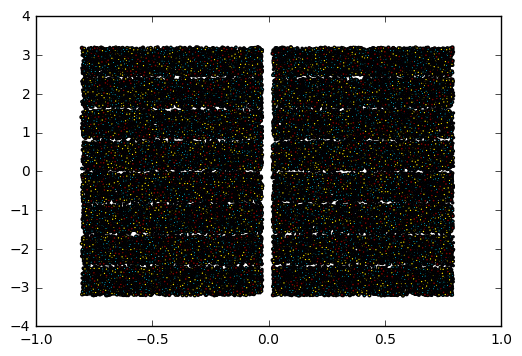

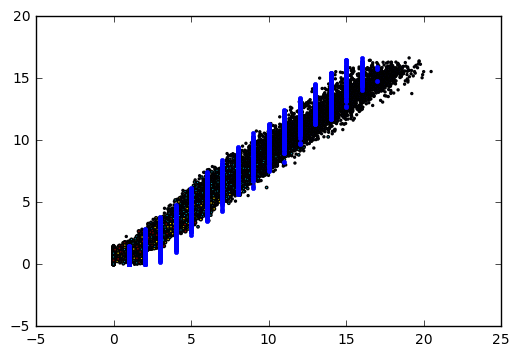

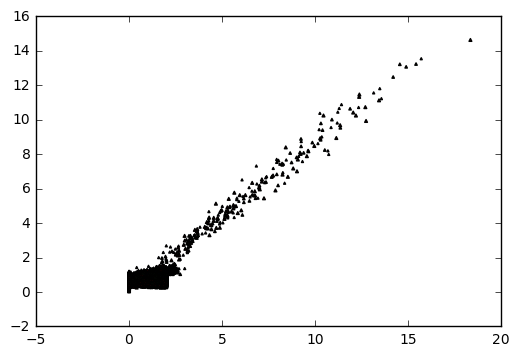

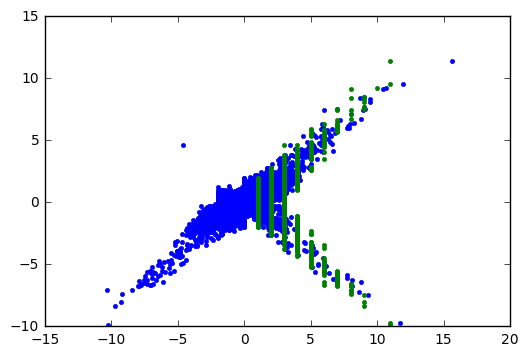

In [163]:
lb = np.ma.masked_where(clus['isBarrel']==0,clus['layer']+1)
le = np.ma.masked_where(clus['isBarrel']==1,clus['layer']+1)
# nn = np.ma.masked_where(np.logical_or(clus['simSY']<5,clus['dy']<clus['simSY']),clus['layer']+1)
plt.scatter(clus['simX'],clus['simY'],s=lb,marker='o',c=clus['layer'])
plt.show()
plt.scatter(clus['dy'],clus['simSY'],s=lb,marker='o',c=clus['layer'])
plt.plot(clus['sy'],clus['simSY'],'.')
plt.show()
plt.scatter(clus['dy'],clus['simSY'],s=le,marker='^',c=clus['layer'])
plt.show()
plt.plot(clus['dx'],clus['simSX'],'.')
plt.plot(clus['sx'],clus['simSX'],'.')
plt.show()

In [164]:
def hist(w) :
    nbins = 100
    y1,xy = np.histogram(clus['sy']-clus['simSY'],np.linspace(-4.,4.,nbins),weights=w, density=True)
    y2,xy = np.histogram(clus['dy']-clus['simSY'],np.linspace(-4.,4.,nbins),weights=w, density=True)
    xy.resize(len(y2))
    x1,xx = np.histogram(abs(clus['sx']-1)-abs(clus['simSX']),np.linspace(-4.,4.,nbins),weights=w, density=True)
    x2,xx = np.histogram(abs(clus['dx'])-abs(clus['simSX']),np.linspace(-4.,4.,nbins),weights=w, density=True)
    x3,xx = np.histogram(clus['dx']-clus['simSX'],np.linspace(-4.,4.,nbins),weights=w*np.greater(clus['sy'],1), density=True)
    xx.resize(len(x2))
    l = np.sqrt(clus['dy']*clus['dy']+clus['dx']*clus['dx'])
    sl = np.sqrt(clus['simSY']*clus['simSY']+clus['simSX']*clus['simSX'])
    ly,lx =  np.histogram(l-sl,np.linspace(-4.,4.,nbins),weights=w, density=True)
    lx.resize(len(ly))
    
    return xy,y1,y2,xx,x1,x2,x3,lx,ly

In [165]:
nbins = 100
isS2 = np.equal(clus['sx'],2)*np.greater(clus['x'],0.5)
isl1 = np.equal(clus['layer'],1)
notl1 = np.logical_not(isl1)
xy,y1,y2,xx,x1,x2,x3,lx,ly = hist((clus['isBarrel'])) # *isl1)

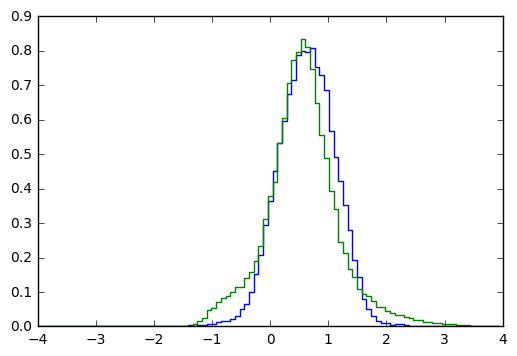

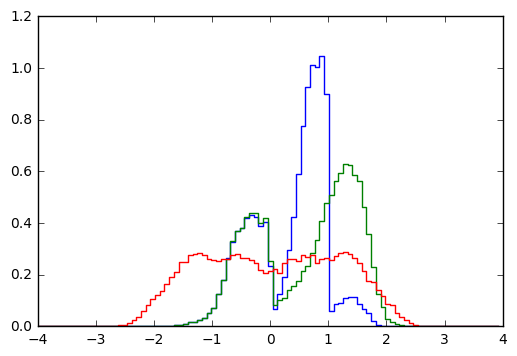

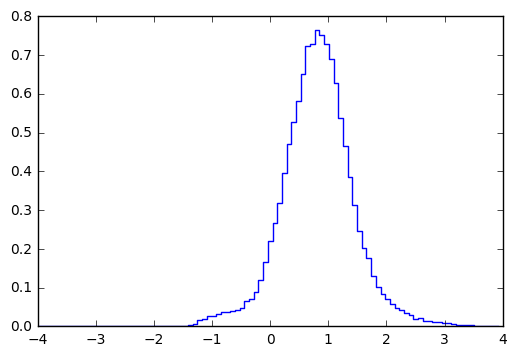

In [166]:
plt.step(xy,y1,where='post')
plt.step(xy,y2,where='post')
plt.show()
plt.step(xx,x1,where='post')
plt.step(xx,x2,where='post')
plt.step(xx,x3,where='post')
plt.show()
plt.step(lx,ly,where='post')
plt.show()

